<a href="https://colab.research.google.com/github/KAyush16/EDA/blob/main/youtube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Introduction
### Project Overview
This project aims to perform a comprehensive analysis of the "Global YouTube Statistics" dataset. The goal is to uncover insights into the factors that contribute to a YouTuber's
success, including subscriber counts, video views, and earnings. The analysis will involve data cleaning, feature engineering, exploratory data analysis (EDA), and statistical analysis to identify trends and patterns.

### Dataset Description
The dataset contains various statistics for top YouTube channels, including:
- **Youtuber:** The name of the YouTube channel.
- **subscribers:** The total number of subscribers.
- **video views:** The total number of video views.
- **category:** The category of the channel's content.
- **uploads:** The total number of videos uploaded.
- **Country:** The country where the YouTuber is based.
- **channel_type:** The type of the channel.
- **created_year:** The year the channel was created.
- **earnings:** Estimated monthly and yearly earnings.
- And other related metrics.

This notebook will be structured into the following sections:
1.  **Data Loading:** Loading the dataset into a pandas DataFrame.
2.  **Data Cleaning and Preprocessing:** Handling missing values, and correcting data types.
3.  **Feature Engineering:** Creating new features to enhance the analysis.
4.  **Exploratory Data Analysis (EDA):**
    *   **Univariate Analysis:** Analyzing individual features to understand their distributions.
    *   **Bivariate Analysis:** Exploring relationships between pairs of features.
    *   **Multivariate Analysis:** Investigating interactions between multiple features.
5.  **Statistical Analysis:** Performing statistical tests to validate findings.
6.  **Conclusion:** Summarizing the key insights and findings from the analysis.

In [144]:
# import dataset
youtube = pd.read_csv('/content/Global YouTube Statistics.csv',encoding = 'latin1')
df = youtube.copy()
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,IN,Music,...,2000000.000,2006.000,Mar,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
1,2,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.000,Mar,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
2,3,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.000,2012.000,Feb,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.000,2006.000,Sep,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,5,SET India,159000000,148000000000.000,Shows,SET India,116536,India,IN,Entertainment,...,1000000.000,2006.000,Sep,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963


## Basic Info and Cleaning of the data

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [146]:
# convert the scientific format to decimal format
pd.options.display.float_format = '{:.3f}'.format
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.000,995.000,995.000,995.000,994.000,879.000,962.000,939.000,995.000,995.000,...,995.000,658.000,990.000,990.000,872.000,872.000,872.000,872.000,872.000,872.000
mean,498.000,22982412.060,11039537052.038,9187.126,554248.904,386.053,745.719,175610284.794,36886.148,589807.848,...,7081813.920,349079.132,2012.630,15.746,63.628,430387266.752,9.279,224214981.632,26.633,-14.128
std,287.376,17526105.341,14110844376.830,34151.352,1362782.210,1232.245,1944.387,416378166.207,71858.724,1148622.478,...,13797037.615,614355.441,4.513,8.778,26.107,472794722.465,4.888,154687362.709,20.561,84.761
min,1.000,12300000.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,...,0.000,1.000,1970.000,1.000,7.600,202506.000,0.750,35588.000,-38.416,-172.105
25%,249.500,14500000.000,4288145410.000,194.500,323.000,11.000,27.000,20137500.000,2700.000,43500.000,...,521750.000,100000.000,2009.000,8.000,36.300,83355411.000,5.270,55908316.000,20.594,-95.713
50%,498.000,17700000.000,7760819588.000,729.000,915.500,51.000,65.500,64085000.000,13300.000,212700.000,...,2600000.000,200000.000,2013.000,16.000,68.000,328239523.000,9.365,270663028.000,37.090,-51.925
75%,746.500,24600000.000,13554701853.000,2667.500,3584.500,123.000,139.750,168826500.000,37900.000,606800.000,...,7300000.000,400000.000,2016.000,23.000,88.200,328239523.000,14.700,270663028.000,37.090,78.963
max,995.000,245000000.000,228000000000.000,301308.000,4057944.000,7741.000,7741.000,6589000000.000,850900.000,13600000.000,...,163400000.000,8000000.000,2022.000,31.000,113.100,1397715000.000,14.720,842933962.000,61.924,138.253


In [147]:
df.isna().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


In [148]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [149]:
# remove unwanted columns
df.tail()
df = df.drop(['rank', 'Abbreviation', 'country_rank', 'created_month',
             'created_date', 'Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population'], axis=1)
df

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Population,Latitude,Longitude
0,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,Music,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,1366417754.000,20.594,78.963
1,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,Games,4055159.000,7423.000,12.000,0.000,0.050,0.040,0.580,NaN,2006.000,328239523.000,37.090,-95.713
2,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,Entertainment,48.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,328239523.000,37.090,-95.713
3,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,328239523.000,37.090,-95.713
4,SET India,159000000,148000000000.000,Shows,SET India,116536,India,Entertainment,3.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,1366417754.000,20.594,78.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,9029609749.000,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525.000,172.000,552513000.000,138100.000,2200000.000,1700000.000,26500000.000,700000.000,2017.000,212559417.000,-14.235,-51.925
991,Free Fire India Official,12300000,1674409945.000,People & Blogs,Free Fire India Official,1500,India,Games,6141.000,69.000,64735000.000,16200.000,258900.000,194200.000,3100000.000,300000.000,2018.000,1366417754.000,20.594,78.963
992,Panda,12300000,2214684303.000,NaN,HybridPanda,2452,United Kingdom,Games,129005.000,1202.000,67035.000,17.000,268.000,201.000,3200.000,1000.000,2006.000,66834405.000,55.378,-3.436
993,RobTopGames,12300000,374123483.000,Gaming,RobTopGames,39,Sweden,Games,35112.000,69.000,3871000.000,968.000,15500.000,11600.000,185800.000,100000.000,2012.000,10285453.000,60.128,18.644


In [150]:
df.columns

Index(['Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'Population',
       'Latitude', 'Longitude'],
      dtype='object')

In [151]:
# category and channel_type (these are same)
# we have to fill channel_type where category is there and viceversa
df['category'].fillna(df['channel_type'], inplace=True)
df['channel_type'].fillna(df['category'], inplace=True)

/tmp/ipython-input-151-176035083.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-151-176035083.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)

In [152]:
# row number 102,445,592 or the nan values of the column channel_type all the values are NaN so we can remove all the three rows
df.dropna(subset=['channel_type'], inplace=True)
display(df.isna().sum())

,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,119
channel_type,0
video_views_rank,1
channel_type_rank,30


In [153]:
# fill country nan values with unknown
df['Country'].fillna('Unknown', inplace=True)

/tmp/ipython-input-153-335145092.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [154]:
# video_views_rank
# row number 735(df[df['video_views_rank'].isna()]) most of the columns are Nan so we could remove it
df.dropna(subset=['video_views_rank'], inplace=True)

In [155]:
# video_views_for_the_last_30_days  ---> most of the values with uploads less than 2 and most columns Nan so we will put that Unknown
df['video_views_for_the_last_30_days'].fillna('Unknown', inplace=True)

/tmp/ipython-input-155-3700735347.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-155-3700735347.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [156]:
# channel_type_rank --> unknown
df['channel_type_rank'].fillna('Unknown', inplace=True)

/tmp/ipython-input-156-1602059878.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-156-1602059878.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [157]:
# created_year --> nan values to unknown
df['created_year'].fillna('Unknown', inplace=True)

/tmp/ipython-input-157-3557113189.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-157-3557113189.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [158]:
df['subscribers_for_last_30_days'].fillna(0, inplace=True)
df['subscribers_for_last_30_days'] = df['subscribers_for_last_30_days'].astype(int)

df['Population'].fillna(0, inplace=True)
df['Population'] = df['Population'].astype(int)

df['Latitude'].fillna(0, inplace=True)
df['Latitude'] = df['Latitude'].astype(int)

df['Longitude'].fillna(0, inplace=True)
df['Longitude'] = df['Longitude'].astype(int)

display(df.isna().sum())

/tmp/ipython-input-158-75020228.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-158-75020228.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' 

,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,0
channel_type,0
video_views_rank,0
channel_type_rank,0


In [159]:
df.isna().sum()

,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,0
channel_type,0
video_views_rank,0
channel_type_rank,0


In [160]:
df.reset_index(drop='True')

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Population,Latitude,Longitude
0,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,Music,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000,2006.000,1366417754,20,78
1,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,Games,4055159.000,7423.000,12.000,0.000,0.050,0.040,0.580,0,2006.000,328239523,37,-95
2,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,Entertainment,48.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000,2012.000,328239523,37,-95
3,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000,2006.000,328239523,37,-95
4,SET India,159000000,148000000000.000,Shows,SET India,116536,India,Entertainment,3.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000,2006.000,1366417754,20,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,Natan por Aï¿,12300000,9029609749.000,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525.000,172.000,552513000.000,138100.000,2200000.000,1700000.000,26500000.000,700000,2017.000,212559417,-14,-51
987,Free Fire India Official,12300000,1674409945.000,People & Blogs,Free Fire India Official,1500,India,Games,6141.000,69.000,64735000.000,16200.000,258900.000,194200.000,3100000.000,300000,2018.000,1366417754,20,78
988,Panda,12300000,2214684303.000,Games,HybridPanda,2452,United Kingdom,Games,129005.000,1202.000,67035.000,17.000,268.000,201.000,3200.000,1000,2006.000,66834405,55,-3
989,RobTopGames,12300000,374123483.000,Gaming,RobTopGames,39,Sweden,Games,35112.000,69.000,3871000.000,968.000,15500.000,11600.000,185800.000,100000,2012.000,10285453,60,18


In [161]:
# created_year --> pd.numeric
df['created_year'] = pd.to_numeric(df['created_year'], errors='coerce')
df.dropna(subset=['created_year'], inplace=True)

# Feature Engg:


In [162]:
df['average_yearly_earnings'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) / 2
df['average_monthly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2

In [163]:
df.head()

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,channel_type_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Population,Latitude,Longitude,average_yearly_earnings,average_monthly_earnings
0,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,Music,1.000,1.000,...,9000000.000,6800000.000,108400000.000,2000000,2006.000,1366417754,20,78,57600000.000,4782300.000
1,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,Games,4055159.000,7423.000,...,0.050,0.040,0.580,0,2006.000,328239523,37,-95,0.310,0.025
2,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,Entertainment,48.000,1.000,...,5400000.000,4000000.000,64700000.000,8000000,2012.000,328239523,37,-95,34350000.000,2868500.000
3,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.000,1.000,...,7900000.000,5900000.000,94800000.000,1000000,2006.000,328239523,37,-95,50350000.000,4196900.000
4,SET India,159000000,148000000000.000,Shows,SET India,116536,India,Entertainment,3.000,2.000,...,7300000.000,5500000.000,87500000.000,1000000,2006.000,1366417754,20,78,46500000.000,3877950.000


# EDA of the Youtube Data

In [164]:
# Define a color scheme for the pie chart
color_scheme = px.colors.sequential.Plasma

category = df['category'].value_counts().sort_values(ascending=True)

fig = px.pie(values=category.values,
             names=category.index,
             color_discrete_sequence=color_scheme)

fig.update_traces(textposition='inside',
                  textfont_size=10,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=10,
                  uniformtext_mode='hide',
                  template ='plotly_white')

fig.show()

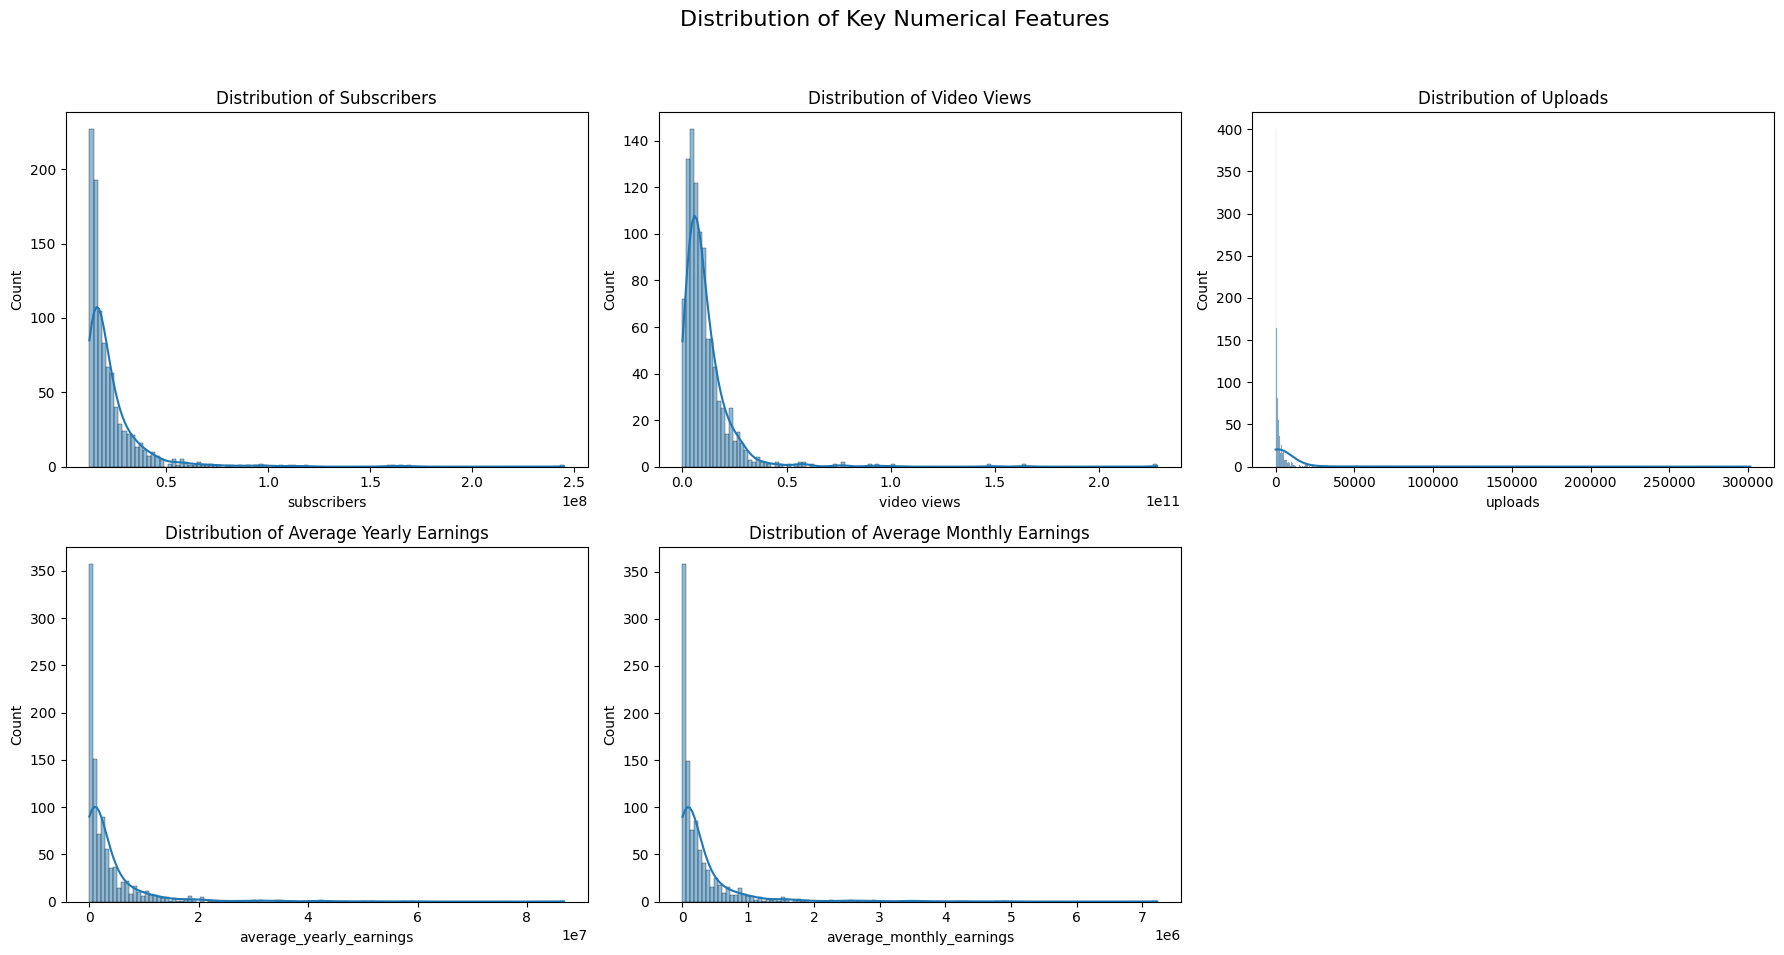

In [204]:
# Distribution of the various Numerical-Columns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16)

sns.histplot(df['subscribers'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Subscribers')

sns.histplot(df['video views'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Video Views')

sns.histplot(df['uploads'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribution of Uploads')

sns.histplot(df['average_yearly_earnings'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Average Yearly Earnings')

sns.histplot(df['average_monthly_earnings'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Average Monthly Earnings')

fig.delaxes(axes[1,2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

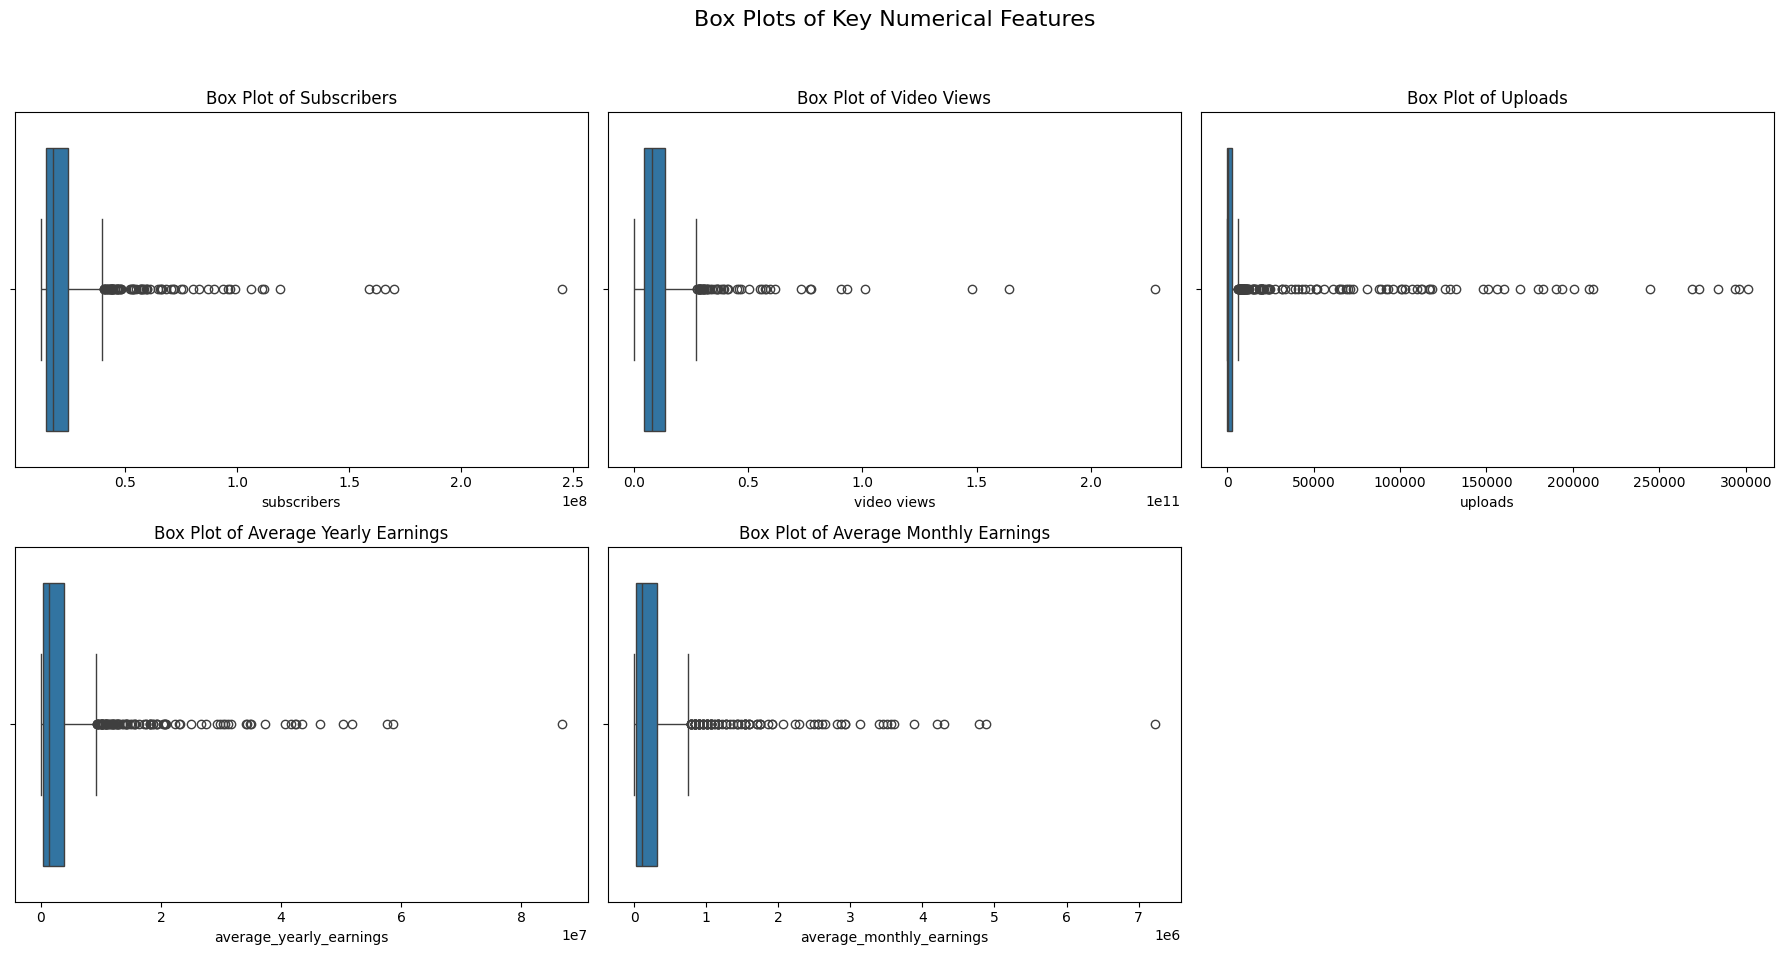

In [166]:
# outlier detection from various Numerical-Features

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Box Plots of Key Numerical Features', fontsize=16)

sns.boxplot(x=df['subscribers'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Subscribers')

sns.boxplot(x=df['video views'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Video Views')

sns.boxplot(x=df['uploads'], ax=axes[0, 2])
axes[0, 2].set_title('Box Plot of Uploads')

sns.boxplot(x=df['average_yearly_earnings'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Average Yearly Earnings')

sns.boxplot(x=df['average_monthly_earnings'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Average Monthly Earnings')

fig.delaxes(axes[1,2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipython-input-167-2037408984.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-167-2037408984.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




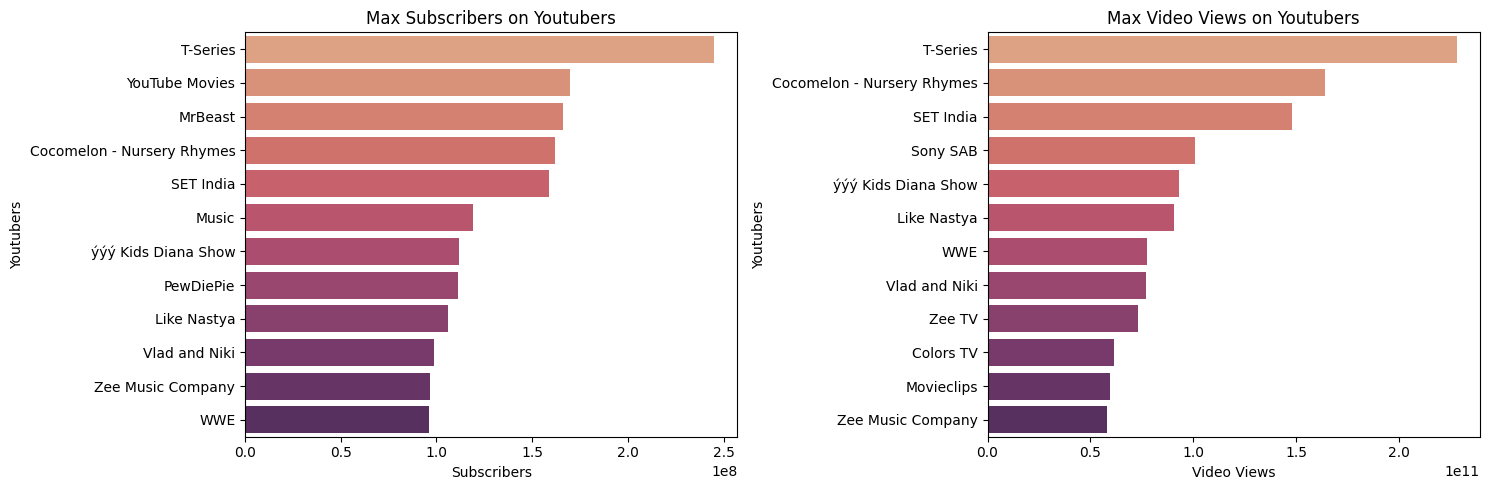

In [167]:
#Top 10  max subscribers on youtuber basis and video views on youtuber basis subplots
youtuber_subscriber = df.groupby('Youtuber')['subscribers'].max().sort_values(ascending=False)
youtuber_views = df.groupby('Youtuber')['video views'].max().sort_values(ascending=False)

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=youtuber_subscriber.values[:12], y=youtuber_subscriber.index[:12],palette="flare",ax=ax[0])
ax[0].set_xlabel('Subscribers')
ax[0].set_ylabel('Youtubers')
ax[0].set_title('Max Subscribers on Youtubers')

sns.barplot(x=youtuber_views.values[:12], y=youtuber_views.index[:12],palette='flare',ax=ax[1])
ax[1].set_xlabel('Video Views')
ax[1].set_ylabel('Youtubers')
ax[1].set_title('Max Video Views on Youtubers')

plt.tight_layout()
plt.show()

/tmp/ipython-input-168-2099708922.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-168-2099708922.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




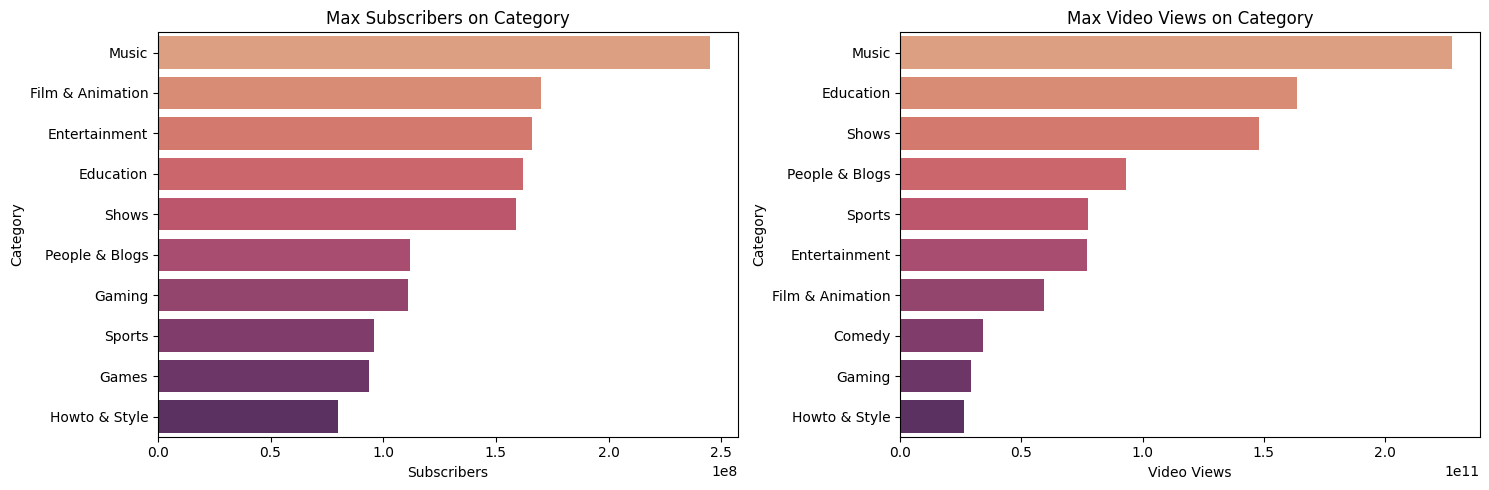

In [168]:
# most subscribers categeory basis and most views category basis
category_subscriber = df.groupby('category')['subscribers'].max().sort_values(ascending=False)
category_views = df.groupby('category')['video views'].max().sort_values(ascending=False)

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=category_subscriber.values[:10], y=category_subscriber.index[:10],palette='flare',ax=ax[0])
ax[0].set_xlabel('Subscribers')
ax[0].set_ylabel('Category')
ax[0].set_title('Max Subscribers on Category')

sns.barplot(x=category_views.values[:10], y=category_views.index[:10],palette='flare',ax=ax[1])
ax[1].set_xlabel('Video Views')
ax[1].set_ylabel('Category')
ax[1].set_title('Max Video Views on Category')

plt.tight_layout()
plt.show()

/tmp/ipython-input-169-4156121427.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-169-4156121427.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




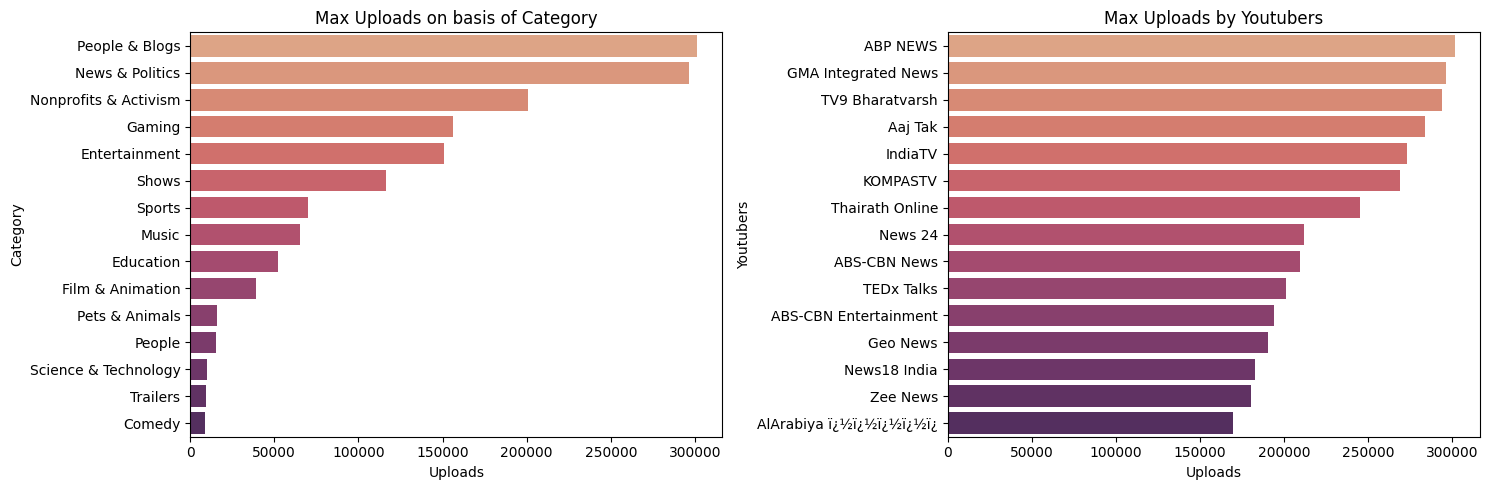

In [169]:
# youtber on most uploads and category on most uploads
category_upload = df.groupby('category')['uploads'].max().sort_values(ascending=False).nlargest(15)
youtuber_upload = df.groupby('Youtuber')['uploads'].max().sort_values(ascending=False).nlargest(15)

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=category_upload.values, y=category_upload.index,palette='flare',ax=ax[0])
ax[0].set_xlabel('Uploads')
ax[0].set_ylabel('Category')
ax[0].set_title('Max Uploads on basis of Category')

sns.barplot(x=youtuber_upload.values, y=youtuber_upload.index,palette='flare',ax=ax[1])
ax[1].set_xlabel('Uploads')
ax[1].set_ylabel('Youtubers')
ax[1].set_title('Max Uploads by Youtubers')

plt.tight_layout()
plt.show()


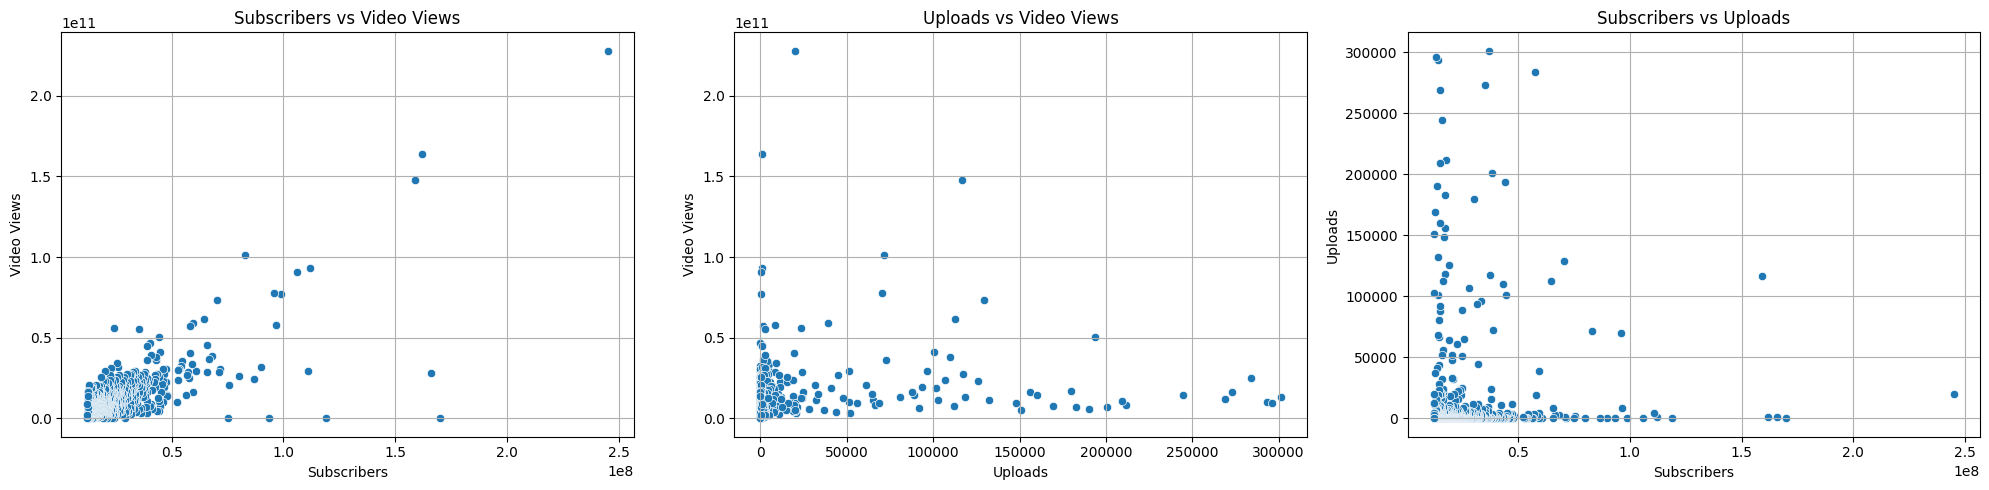

In [170]:
# Create scatter plots for bivariate analysis
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Subscribers vs Video Views
sns.scatterplot(ax=axs[0], data=df, x='subscribers', y='video views')
axs[0].set_title('Subscribers vs Video Views')
axs[0].set_xlabel('Subscribers')
axs[0].set_ylabel('Video Views')
axs[0].grid(True)

# Uploads vs Video Views
sns.scatterplot(ax=axs[1], data=df, x='uploads', y='video views')
axs[1].set_title('Uploads vs Video Views')
axs[1].set_xlabel('Uploads')
axs[1].set_ylabel('Video Views')
axs[1].grid(True)

# Subscribers vs Uploads
sns.scatterplot(ax=axs[2], data=df, x='subscribers', y='uploads')
axs[2].set_title('Subscribers vs Uploads')
axs[2].set_xlabel('Subscribers')
axs[2].set_ylabel('Uploads')
axs[2].grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-171-855340570.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




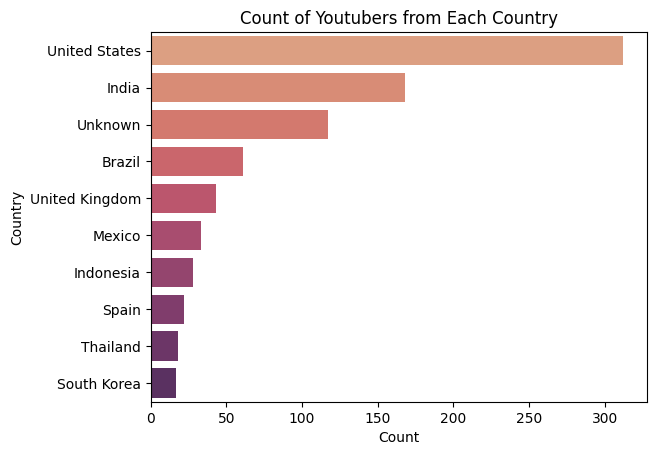

In [171]:
# count of youtuber from each country
youtuber_country = df.groupby('Country')['Youtuber'].count().sort_values(ascending=False)
sns.barplot(x=youtuber_country.values[:10], y=youtuber_country.index[:10],palette='flare')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Count of Youtubers from Each Country')
plt.show()

/tmp/ipython-input-172-3262855979.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




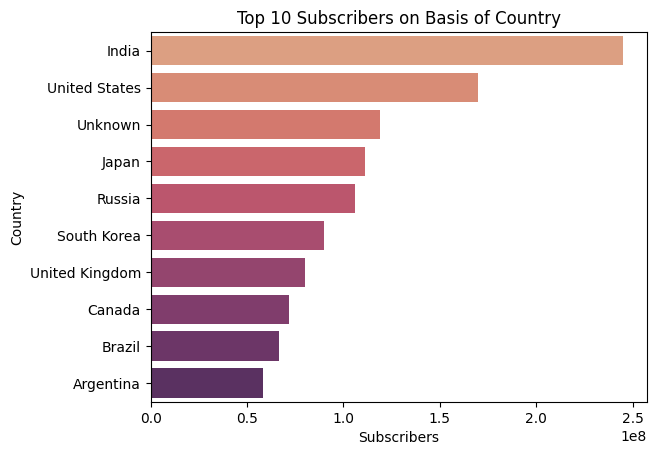

In [172]:
# top 10 subscriber on basis of country
youtuber_country = df.groupby('Country')['subscribers'].max().sort_values(ascending=False)
sns.barplot(x=youtuber_country.values[:10], y=youtuber_country.index[:10],palette='flare')
plt.xlabel('Subscribers')
plt.ylabel('Country')
plt.title('Top 10 Subscribers on Basis of Country')
plt.show()

/tmp/ipython-input-173-1321239921.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




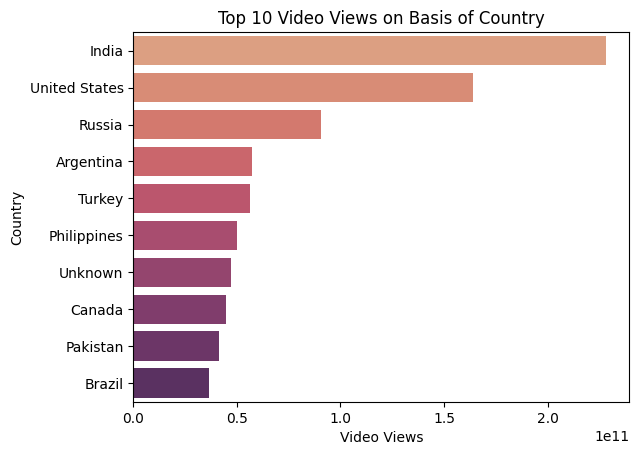

In [173]:
# top 10 views on basis of country
youtuber_country = df.groupby('Country')['video views'].max().sort_values(ascending=False)
sns.barplot(x=youtuber_country.values[:10], y=youtuber_country.index[:10],palette='flare')
plt.xlabel('Video Views')
plt.ylabel('Country')
plt.title('Top 10 Video Views on Basis of Country')
plt.show()

In [174]:
# top 5 youtubers from each country
top_5_youtubers_per_country = df.groupby('Country').head(5).sort_values(['Country', 'subscribers'], ascending=[True, False])
display(top_5_youtubers_per_country)

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,channel_type_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Population,Latitude,Longitude,average_yearly_earnings,average_monthly_earnings
377,Linkin Park,20400000,13397000296.000,Music,linkinpark,0,Afghanistan,Games,4057944.000,7136.000,...,0.000,0.000,0.000,12,2006.000,38041754,33,67,0.000,0.000
663,Musas,15100000,2400037562.000,Howto & Style,Jordi Sala,159,Andorra,People,3889418.000,7615.000,...,0.340,0.260,4.000,0,2006.000,0,0,0,2.130,0.180
31,El Reino Infantil,58400000,57271630846.000,Music,El Reino Infantil,1510,Argentina,Music,13.000,11.000,...,2400000.000,1800000.000,29400000.000,600000,2011.000,44938712,-38,-63,15600000.000,1276500.000
105,La Granja de Zenï¿½,35700000,27118354077.000,Music,La Granja de Zenï¿½,654,Argentina,Music,58.000,37.000,...,1200000.000,906200.000,14500000.000,400000,2013.000,44938712,-38,-63,7703100.000,637750.000
153,TheDonato,31200000,6187804950.000,Entertainment,TheDonato,3027,Argentina,Games,997.000,12.000,...,762700.000,572000.000,9200000.000,1900000,2015.000,44938712,-38,-63,4886000.000,405200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,Badabun,46800000,19398045702.000,Entertainment,badabun,1,Unknown,Music,4047729.000,5525.000,...,2.000,1.000,21.000,75,2007.000,0,0,0,11.000,1.055
151,YOLO AVENTURAS,31200000,9673649438.000,People & Blogs,YOLO AVENTURAS,65,Venezuela,Comedy,3361188.000,2270.000,...,14.000,11.000,172.000,100,2018.000,28515829,6,-66,91.500,7.450
489,Like Nastya VNM,17900000,9867515979.000,Entertainment,Like Nastya VNM,602,Vietnam,Entertainment,455.000,121.000,...,337900.000,253400.000,4100000.000,100000,2019.000,96462106,14,108,2176700.000,179500.000
585,POPS Kids,16200000,9763592867.000,Music,POPS Kids,3943,Vietnam,Film,462.000,30.000,...,1000000.000,770200.000,12300000.000,200000,2014.000,96462106,14,108,6535100.000,532100.000


/tmp/ipython-input-175-2325067719.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-175-2325067719.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




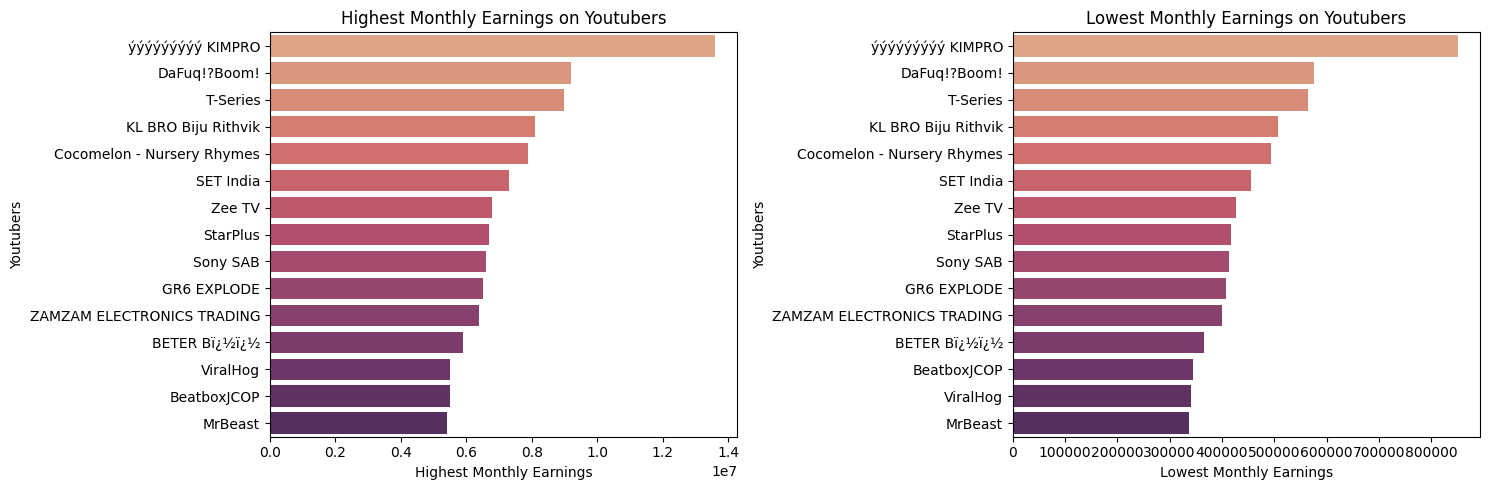

In [175]:
# top 15 lowest and higest monthly earnings(on basis of youtubers)
highest_monthly_earnings = df.groupby('Youtuber')['highest_monthly_earnings'].sum().sort_values(ascending=False)
lowest_monthly_earnings = df.groupby('Youtuber')['lowest_monthly_earnings'].sum().sort_values(ascending=False)

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=highest_monthly_earnings.values[:15], y=highest_monthly_earnings.index[:15],palette='flare',ax=ax[0])
ax[0].set_xlabel('Highest Monthly Earnings')
ax[0].set_ylabel('Youtubers')
ax[0].set_title('Highest Monthly Earnings on Youtubers')

sns.barplot(x=lowest_monthly_earnings.values[:15], y=lowest_monthly_earnings.index[:15],palette='flare',ax=ax[1])
ax[1].set_xlabel('Lowest Monthly Earnings')
ax[1].set_ylabel('Youtubers')
ax[1].set_title('Lowest Monthly Earnings on Youtubers')

plt.tight_layout()
plt.show()

/tmp/ipython-input-176-28980231.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-176-28980231.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




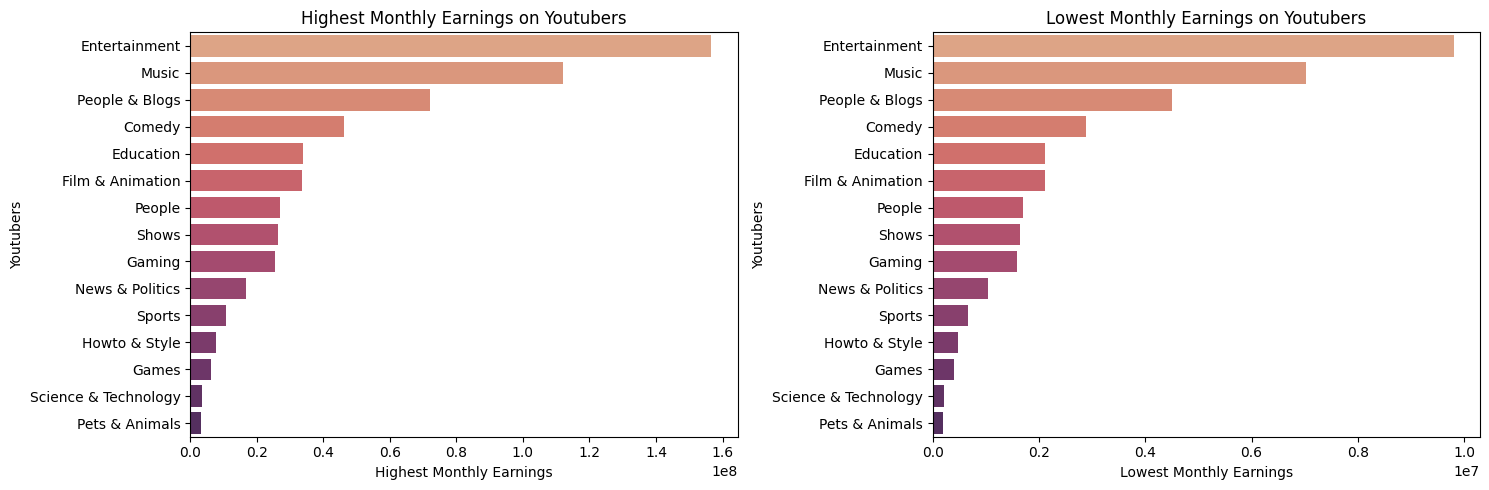

In [176]:
# top 15 lowest and higest monthly earnings(on basis of category)
highest_monthly_earnings = df.groupby('category')['highest_monthly_earnings'].sum().sort_values(ascending=False)
lowest_monthly_earnings = df.groupby('category')['lowest_monthly_earnings'].sum().sort_values(ascending=False)

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=highest_monthly_earnings.values[:15], y=highest_monthly_earnings.index[:15],palette='flare',ax=ax[0])
ax[0].set_xlabel('Highest Monthly Earnings')
ax[0].set_ylabel('Youtubers')
ax[0].set_title('Highest Monthly Earnings on Youtubers')

sns.barplot(x=lowest_monthly_earnings.values[:15], y=lowest_monthly_earnings.index[:15],palette='flare',ax=ax[1])
ax[1].set_xlabel('Lowest Monthly Earnings')
ax[1].set_ylabel('Youtubers')
ax[1].set_title('Lowest Monthly Earnings on Youtubers')

plt.tight_layout()
plt.show()

/tmp/ipython-input-177-3196530420.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-177-3196530420.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




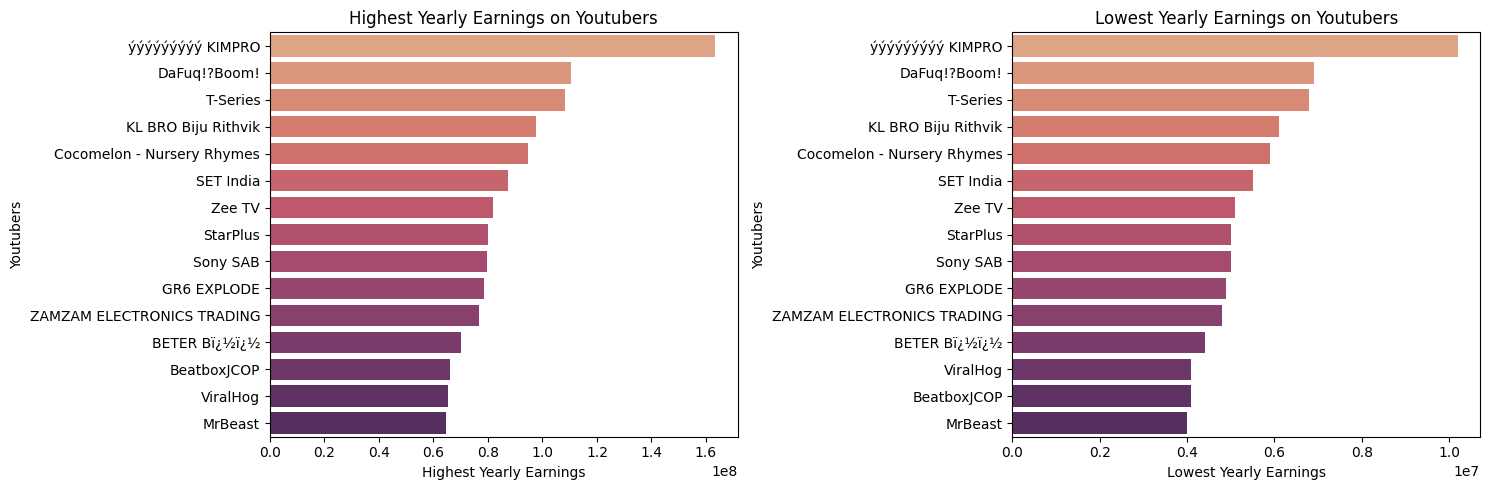

In [177]:
# top 15 lowest and highest yearly earnings(on basis of youtubers)
highest_yearly_earnings = df.groupby('Youtuber')['highest_yearly_earnings'].sum().sort_values(ascending=False)
lowest_yearly_earnings = df.groupby('Youtuber')['lowest_yearly_earnings'].sum().sort_values(ascending=False)

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=highest_yearly_earnings.values[:15], y=highest_yearly_earnings.index[:15],palette='flare',ax=ax[0])
ax[0].set_xlabel('Highest Yearly Earnings')
ax[0].set_ylabel('Youtubers')
ax[0].set_title('Highest Yearly Earnings on Youtubers')

sns.barplot(x=lowest_yearly_earnings.values[:15], y=lowest_yearly_earnings.index[:15],palette='flare',ax=ax[1])
ax[1].set_xlabel('Lowest Yearly Earnings')
ax[1].set_ylabel('Youtubers')
ax[1].set_title('Lowest Yearly Earnings on Youtubers')

plt.tight_layout()
plt.show()

/tmp/ipython-input-178-1802302633.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-178-1802302633.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




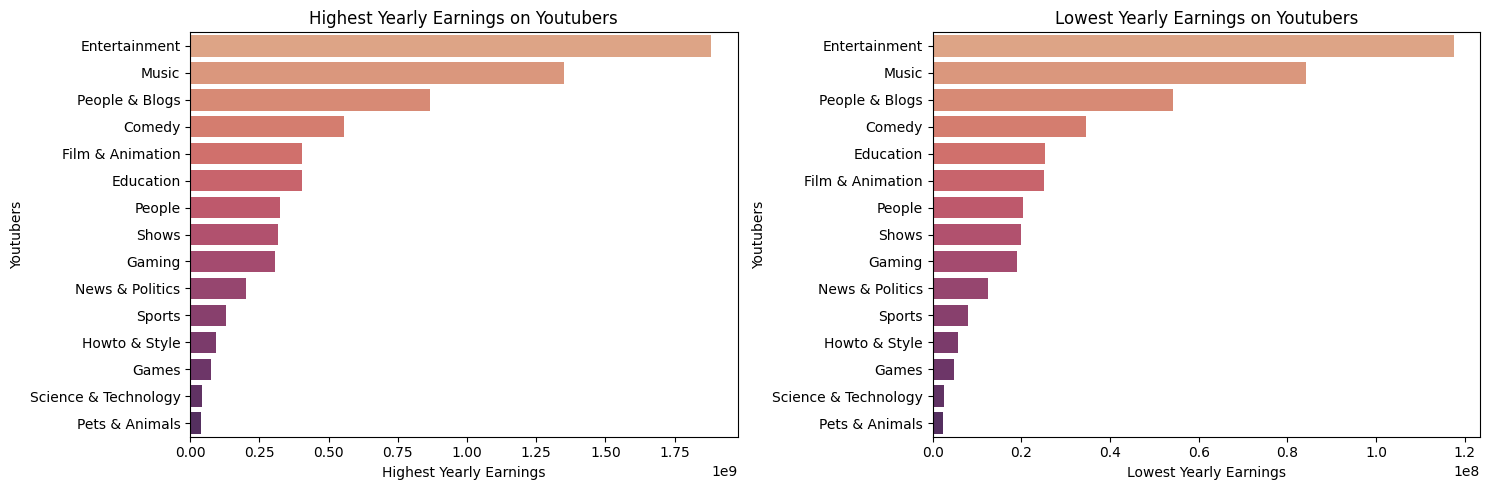

In [178]:
# top 15 lowest and highest yearly earnings(on basis of category)
highest_yearly_earnings = df.groupby('category')['highest_yearly_earnings'].sum().sort_values(ascending=False)
lowest_yearly_earnings = df.groupby('category')['lowest_yearly_earnings'].sum().sort_values(ascending=False)

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=highest_yearly_earnings.values[:15], y=highest_yearly_earnings.index[:15],palette='flare',ax=ax[0])
ax[0].set_xlabel('Highest Yearly Earnings')
ax[0].set_ylabel('Youtubers')
ax[0].set_title('Highest Yearly Earnings on Youtubers')

sns.barplot(x=lowest_yearly_earnings.values[:15], y=lowest_yearly_earnings.index[:15],palette='flare',ax=ax[1])
ax[1].set_xlabel('Lowest Yearly Earnings')
ax[1].set_ylabel('Youtubers')
ax[1].set_title('Lowest Yearly Earnings on Youtubers')

plt.tight_layout()
plt.show()

/tmp/ipython-input-179-3281402464.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-179-3281402464.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




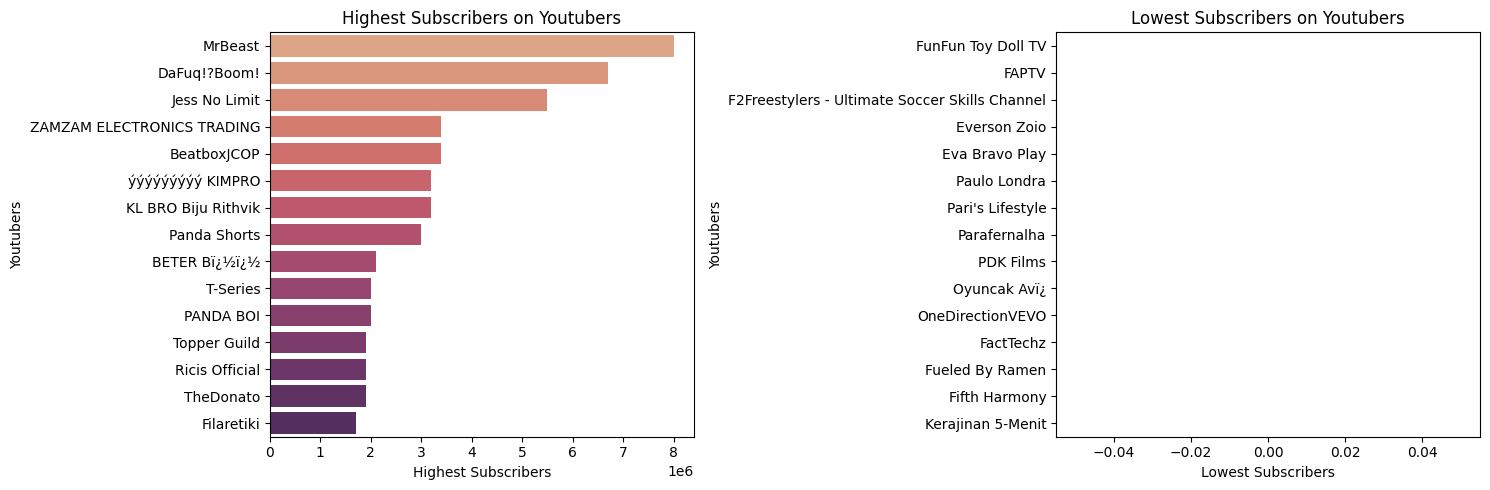

In [179]:
# highest and lowest subscribers for youtubers in last 30 days
highest_subscribers = df.groupby('Youtuber')['subscribers_for_last_30_days'].sum().sort_values(ascending=False)
lowest_subscribers = df.groupby('Youtuber')['subscribers_for_last_30_days'].sum().sort_values(ascending=True)


fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=highest_subscribers.values[:15], y=highest_subscribers.index[:15],palette='flare',ax=ax[0])
ax[0].set_xlabel('Highest Subscribers')
ax[0].set_ylabel('Youtubers')
ax[0].set_title('Highest Subscribers on Youtubers')

sns.barplot(x=lowest_subscribers.values[:15], y=lowest_subscribers.index[:15],palette='flare',ax=ax[1])
ax[1].set_xlabel('Lowest Subscribers')
ax[1].set_ylabel('Youtubers')
ax[1].set_title('Lowest Subscribers on Youtubers')

plt.tight_layout()
plt.show()

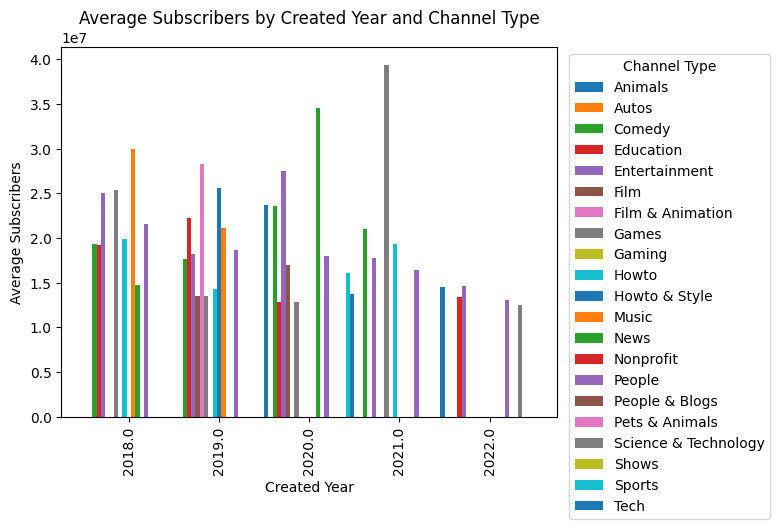

In [181]:
df.groupby(['created_year', 'channel_type'])['subscribers'].mean().unstack().tail().plot(kind='bar', width= 1)
plt.title('Average Subscribers by Created Year and Channel Type')
plt.xlabel('Created Year')
plt.ylabel('Average Subscribers')
plt.legend(title= 'Channel Type', bbox_to_anchor= (1.01, 1), loc = 'upper left')
plt.show()

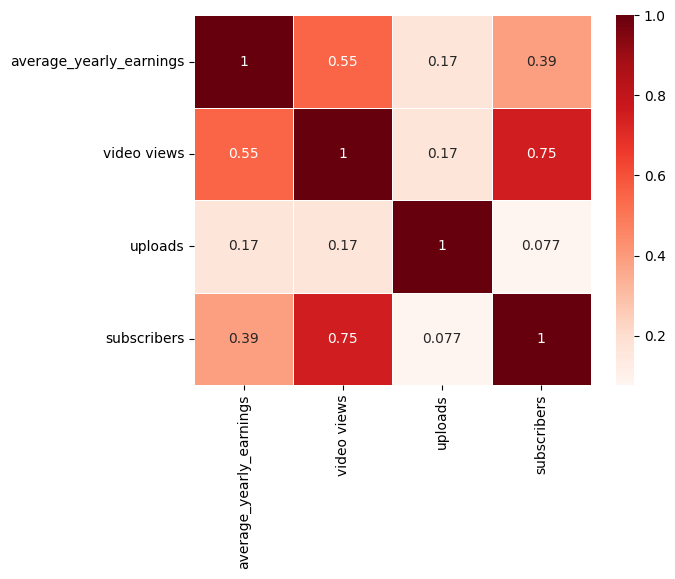

In [182]:
# subscriber-views relation
df_corr = df[['average_yearly_earnings', 'video views', 'uploads', 'subscribers']]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='Reds')
plt.show()

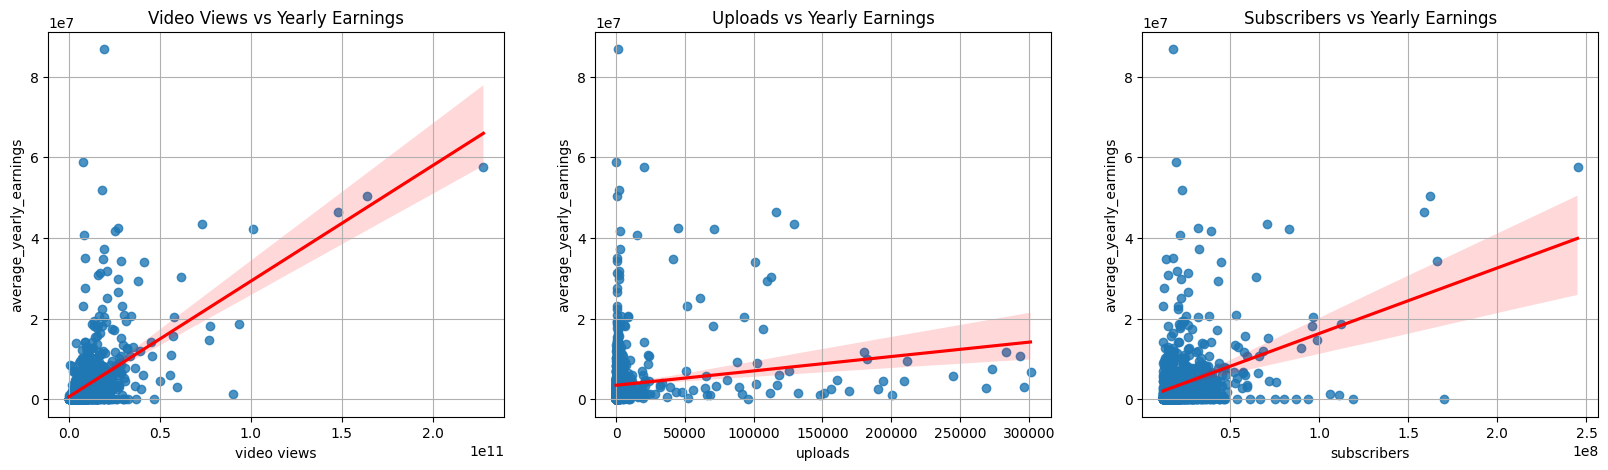

In [183]:
# video Views, Uploads, Subscribers vs Yearly Earnings
fig, axs = plt.subplots(1, 3, figsize=(20,5))

sns.regplot(ax=axs[0], data=df, x='video views', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df, x='uploads', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[2], data=df, x='subscribers', y='average_yearly_earnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Video Views vs Yearly Earnings')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')
axs[2].grid(True)
axs[2].set_title('Subscribers vs Yearly Earnings')
plt.show()

/tmp/ipython-input-184-3798842384.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Category vs Average Yearly Earnings')

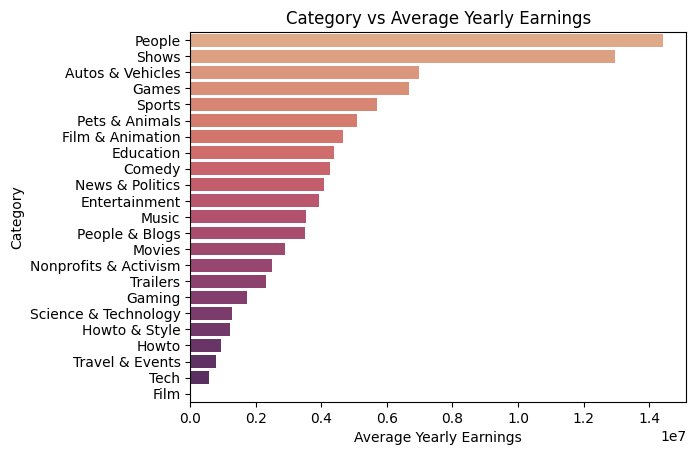

In [184]:
# category vs avg-yearly-earnings
category_avg_yearly_earnings = df.groupby('category')['average_yearly_earnings'].mean().sort_values(ascending=False)
sns.barplot(x=category_avg_yearly_earnings.values, y=category_avg_yearly_earnings.index,palette='flare')
plt.xlabel('Average Yearly Earnings')
plt.ylabel('Category')
plt.title('Category vs Average Yearly Earnings')

In [185]:
# category with video views and yearly earning(copied from kaggle)
fig = px.scatter(df, x="subscribers", y="average_yearly_earnings",
                 size="average_yearly_earnings", color="category", size_max=60,
                 title="Categories with Video Views and Yearly Earnings",
                 template = 'plotly_white')
fig.update_layout(
    xaxis=dict(
        title='Subscribers',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Yearly Earnings',
        titlefont_size=16
    ),
)

fig.show()

In [188]:
df.head()

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,channel_type_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Population,Latitude,Longitude,average_yearly_earnings,average_monthly_earnings
0,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,Music,1.000,1.000,...,9000000.000,6800000.000,108400000.000,2000000,2006.000,1366417754,20,78,57600000.000,4782300.000
1,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,Games,4055159.000,7423.000,...,0.050,0.040,0.580,0,2006.000,328239523,37,-95,0.310,0.025
2,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,Entertainment,48.000,1.000,...,5400000.000,4000000.000,64700000.000,8000000,2012.000,328239523,37,-95,34350000.000,2868500.000
3,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.000,1.000,...,7900000.000,5900000.000,94800000.000,1000000,2006.000,328239523,37,-95,50350000.000,4196900.000
4,SET India,159000000,148000000000.000,Shows,SET India,116536,India,Entertainment,3.000,2.000,...,7300000.000,5500000.000,87500000.000,1000000,2006.000,1366417754,20,78,46500000.000,3877950.000


In [190]:
## Feature Engineering

# channel-age from created year till today
current_year = 2025
df['created_year'] = pd.to_numeric(df['created_year'], errors='coerce')
df['channel_age'] = current_year - df['created_year']

# subscribers growth rate
df['subscribers_for_last_30_days'] = pd.to_numeric(df['subscribers_for_last_30_days'], errors='coerce')
df['subscriber_growth_rate'] = df['subscribers_for_last_30_days'] / df['subscribers']
df['subscriber_growth_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)


# average_views_per_upload ---> video_views/number_of_uploads
df['average_views_per_upload'] = df['video views'] / df['uploads']
df['average_views_per_upload'].replace([np.inf, -np.inf], np.nan, inplace=True)

display(df[[ 'channel_age', 'subscriber_growth_rate', 'average_views_per_upload']].head())

/tmp/ipython-input-190-1006991875.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-190-1006991875.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=T

,channel_age,subscriber_growth_rate,average_views_per_upload
0,19.000,0.008,11353450.852
1,19.000,0.000,0.000
2,13.000,0.048,38284536.937
3,19.000,0.006,169772256.729
4,19.000,0.006,1269993.822


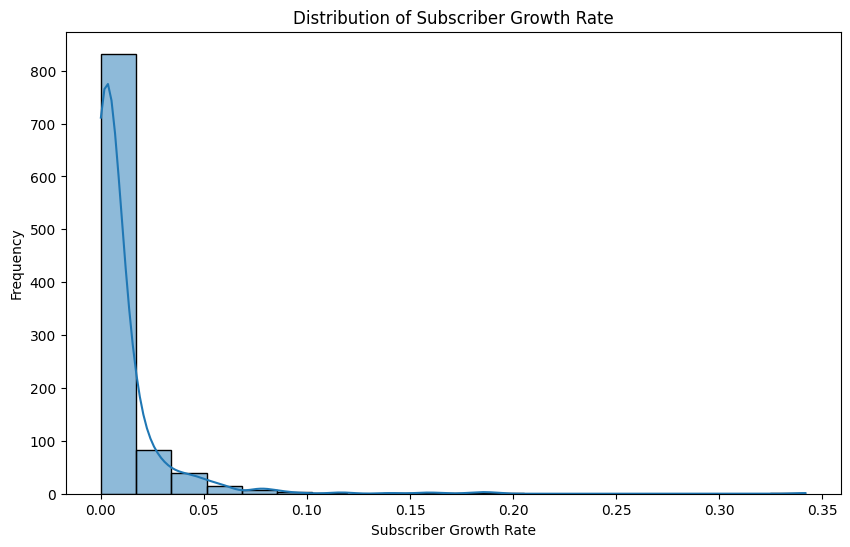

In [199]:
# plot on the basis of subscriber_growth_rate of youtubers
plt.figure(figsize=(10, 6))
sns.histplot(df['subscriber_growth_rate'], bins=20, kde=True)
plt.xlabel('Subscriber Growth Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Subscriber Growth Rate')
plt.show()

/tmp/ipython-input-201-1259794997.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




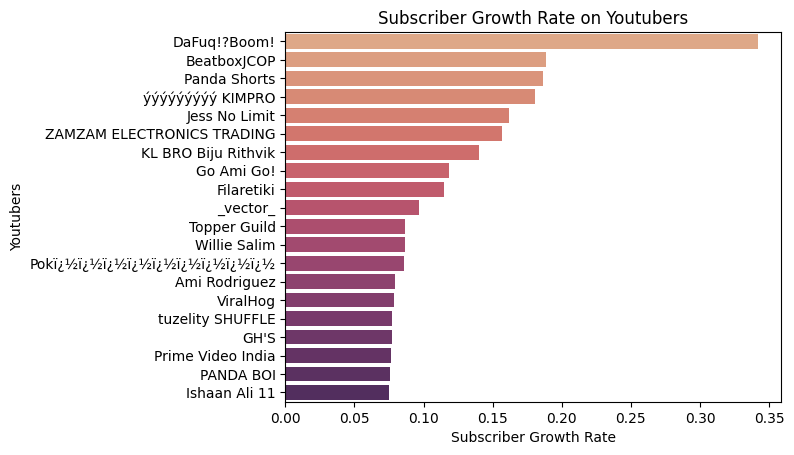

In [201]:
subscriber_growth_youtuber = df.groupby('Youtuber')['subscriber_growth_rate'].max().sort_values(ascending=False)
sns.barplot(x=subscriber_growth_youtuber.values[:20], y=subscriber_growth_youtuber.index[:20],palette='flare')
plt.xlabel('Subscriber Growth Rate')
plt.ylabel('Youtubers')
plt.title('Subscriber Growth Rate on Youtubers')
plt.show()

/tmp/ipython-input-202-4223208220.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-202-4223208220.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




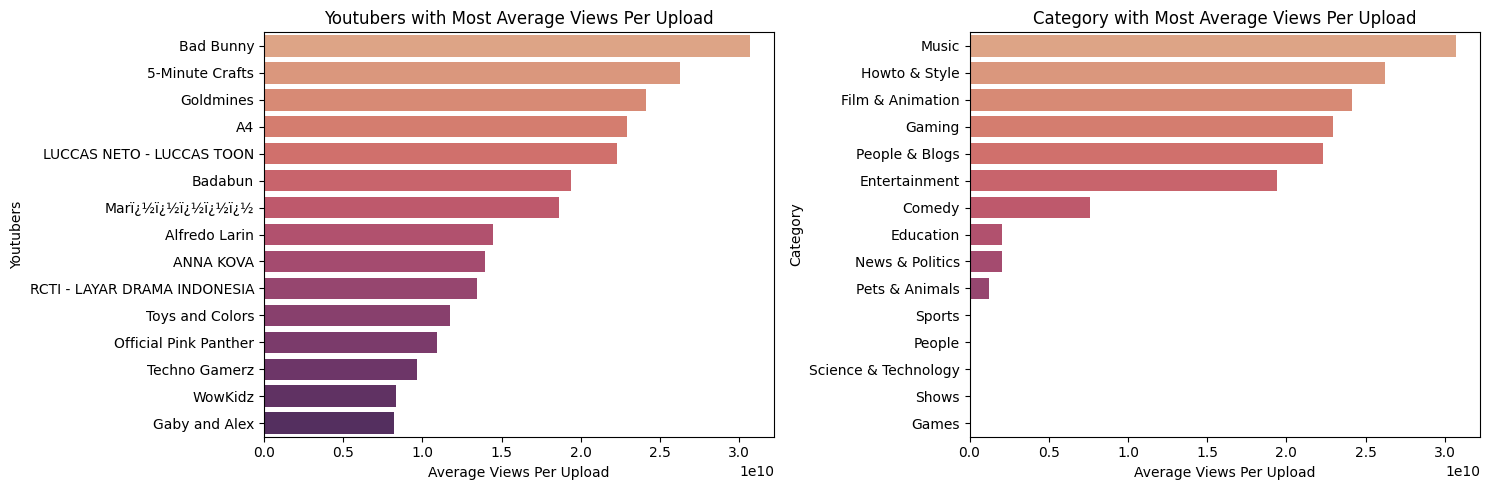

In [202]:
# plot youtuber with most average_views_per_upload  and category with most average_views_per_upload
youtuber_average_views_per_upload = df.groupby('Youtuber')['average_views_per_upload'].max().sort_values(ascending=False)
category_average_views_per_upload = df.groupby('category')['average_views_per_upload'].max().sort_values(ascending=False)

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=youtuber_average_views_per_upload.values[:15], y=youtuber_average_views_per_upload.index[:15],palette='flare',ax=ax[0])
ax[0].set_xlabel('Average Views Per Upload')
ax[0].set_ylabel('Youtubers')
ax[0].set_title('Youtubers with Most Average Views Per Upload')

sns.barplot(x=category_average_views_per_upload.values[:15], y=category_average_views_per_upload.index[:15],palette='flare',ax=ax[1])
ax[1].set_xlabel('Average Views Per Upload')
ax[1].set_ylabel('Category')
ax[1].set_title('Category with Most Average Views Per Upload')

plt.tight_layout()
plt.show()


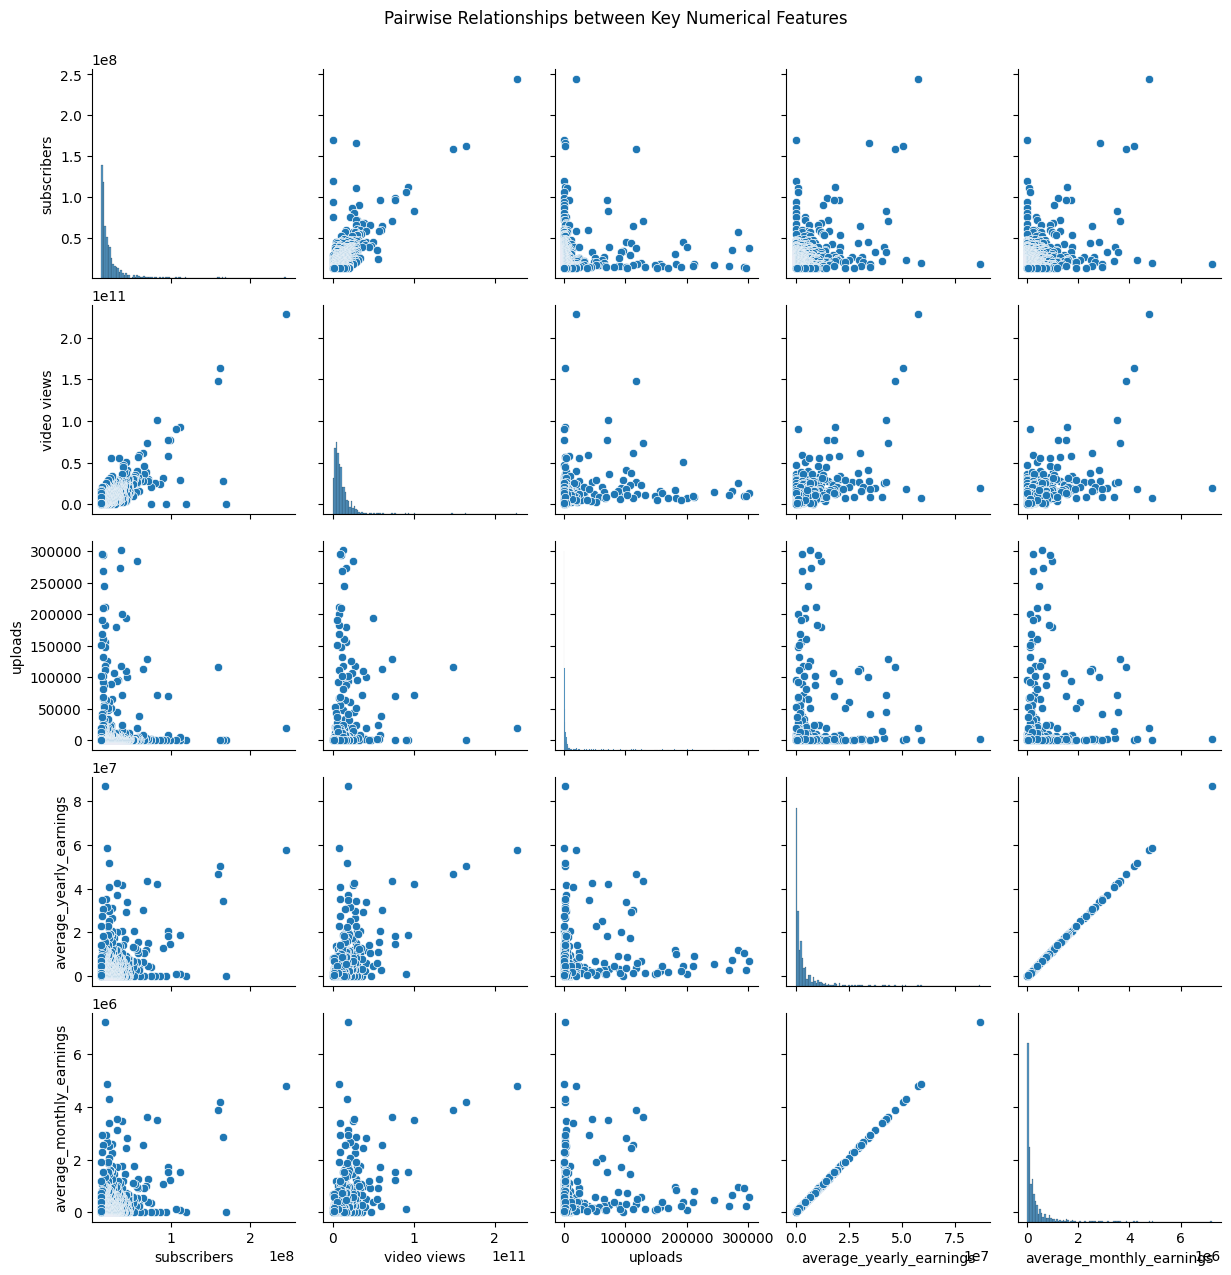

In [194]:
# Use pairplot to visualize relationships between key numerical features
sns.pairplot(df[['subscribers', 'video views', 'uploads', 'average_yearly_earnings', 'average_monthly_earnings']])
plt.suptitle('Pairwise Relationships between Key Numerical Features', y=1.02)
plt.show()

In [187]:
# New dataframen to hold the count of Youtubers by Country
selected_columns = ['Youtuber', 'Country', 'Latitude', 'Longitude']

count_Country = df[selected_columns]

count_Country = count_Country.groupby(['Country','Latitude','Longitude'])['Youtuber'].count().reset_index(name='Youtuber_Count').sort_values(by='Youtuber_Count', ascending=False)

fig = px.scatter_geo(count_Country, lat = 'Latitude', lon='Longitude', text='Country', hover_name='Youtuber_Count', color = 'Country', template='ggplot2',
                    color_continuous_scale='deep', title = 'Number of Youtubers per Country (Top 1000)')

fig.update_layout(
    height = 400,
    font=dict(family='Times New Roman', size=13),
    margin=dict(l=0, r=0, b=10, t=50),

)

fig.update_geos(
    resolution=110,
    showland=True, landcolor='Beige',
    showocean=True, oceancolor="LightBlue",
)

fig.show()

/tmp/ipython-input-186-3504488675.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




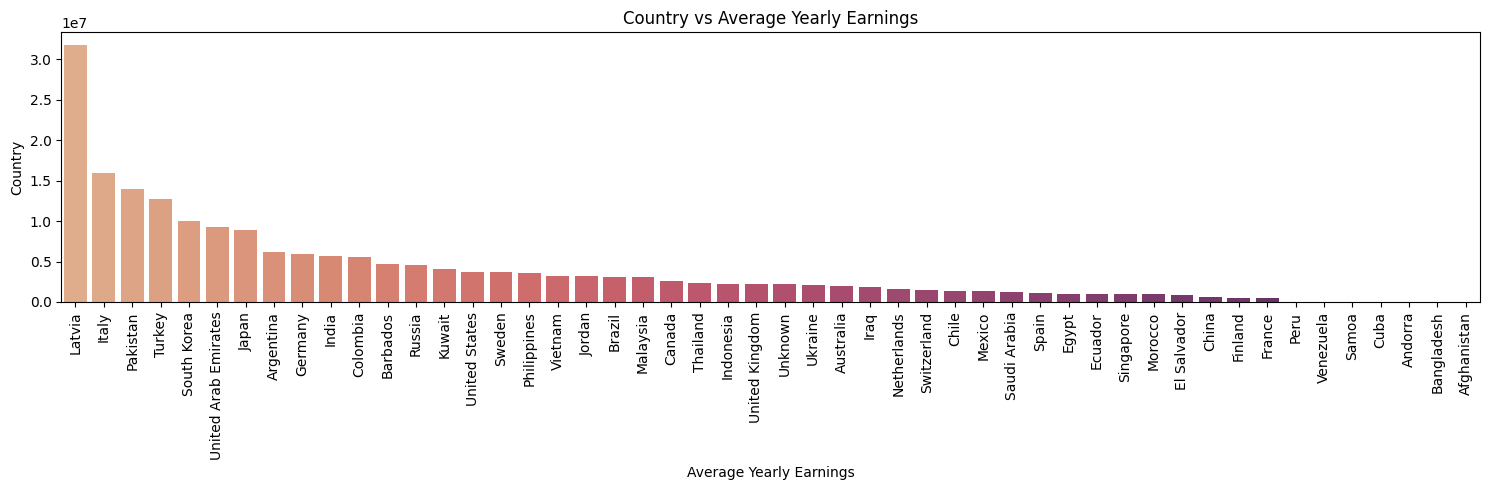

In [186]:
# country vs avg-yearly-earnings
country_avg_yearly_earnings = df.groupby('Country')['average_yearly_earnings'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(y=country_avg_yearly_earnings.values, x=country_avg_yearly_earnings.index,palette='flare')
plt.xlabel('Average Yearly Earnings')
plt.xticks(rotation=90)
plt.ylabel('Country')
plt.title('Country vs Average Yearly Earnings')
plt.tight_layout()
plt.show()

In [189]:
# Calculate descriptive statistics for key numerical columns
numerical_cols = ['subscribers', 'video views', 'uploads', 'average_yearly_earnings', 'average_monthly_earnings']
descriptive_stats = df[numerical_cols].describe()
display("Descriptive Statistics for Key Numerical Columns:", descriptive_stats)

# Calculate the correlation matrix for the key numerical columns
correlation_matrix = df[numerical_cols].corr()
display("Correlation Matrix:", correlation_matrix)

# Group by 'category' and calculate the mean of numerical columns
category_means = df.groupby('category')[numerical_cols].mean()
display("Mean of Numerical Columns by Category:", category_means)

# Group by 'Country' and calculate the mean of numerical columns
country_means = df.groupby('Country')[numerical_cols].mean()
display("Mean of Numerical Columns by Country:", country_means)

'Descriptive Statistics for Key Numerical Columns:'

,subscribers,video views,uploads,average_yearly_earnings,average_monthly_earnings
count,987.000,987.000,987.000,987.000,987.000
mean,23005369.807,11084474555.004,9261.589,3792528.346,315886.791
std,17584257.364,14152314843.638,34279.550,7350905.681,612053.980
min,12300000.000,0.000,0.000,0.000,0.000
25%,14500000.000,4310849468.500,205.500,292075.000,24375.000
50%,17700000.000,7762905663.000,741.000,1381200.000,115000.000
75%,24600000.000,13569998307.500,2725.500,3904575.000,325225.000
max,245000000.000,228000000000.000,301308.000,86800000.000,7225450.000


'Correlation Matrix:'

,subscribers,video views,uploads,average_yearly_earnings,average_monthly_earnings
subscribers,1.000,0.752,0.077,0.389,0.389
video views,0.752,1.000,0.165,0.552,0.551
uploads,0.077,0.165,1.000,0.166,0.166
average_yearly_earnings,0.389,0.552,0.166,1.000,1.000
average_monthly_earnings,0.389,0.551,0.166,1.000,1.000


'Mean of Numerical Columns by Category:'

,subscribers,video views,uploads,average_yearly_earnings,average_monthly_earnings
category,,,,,
Autos & Vehicles,17850000.000,7501729070.500,1898.500,6994875.000,577325.000
Comedy,20123188.406,7972648903.116,1119.754,4269794.797,355089.877
Education,25991836.735,14264000764.939,2896.776,4384841.848,366034.787
Entertainment,21636862.745,10510307018.059,11283.498,3922881.517,326389.552
Film,12500000.000,161254021.000,61.000,0.000,0.000
Film & Animation,28584782.609,11835271941.587,2799.652,4672382.162,389243.448
Games,30883333.333,4214616211.333,1043.500,6677333.417,560498.750
Gaming,20887096.774,7676199487.817,4359.796,1746176.889,145984.739
Howto,19300000.000,264228052.000,335.000,955750.000,79000.000


'Mean of Numerical Columns by Country:'

,subscribers,video views,uploads,average_yearly_earnings,average_monthly_earnings
Country,,,,,
Afghanistan,20400000.000,13397000296.000,0.000,0.000,0.000
Andorra,15100000.000,2400037562.000,159.000,2.130,0.180
Argentina,25269230.769,14955027227.231,1326.154,6150269.260,509680.772
Australia,19300000.000,8173683141.750,897.375,1930331.782,162800.046
Bangladesh,13900000.000,12129583055.000,6.000,0.025,0.000
Barbados,41900000.000,22477745835.000,84.000,4674400.000,388700.000
Brazil,19791803.279,7848659937.344,2757.016,3029365.926,251314.795
Canada,24260000.000,12754704939.133,3116.333,2629373.333,217846.667
Chile,29066666.667,9782518859.000,2257.000,1416633.692,118033.368


## Summary of Data Analysis

Based on the exploratory data analysis performed so far, here are the key findings:

*   **Category Distribution:** The pie chart shows the distribution of YouTube channels across different categories, with "Entertainment," "Music," and "People & Blogs" being the most prevalent.
*   **Distribution of Numerical Features:** Histograms and box plots reveal the distribution of subscribers, video views, uploads, and earnings. These plots indicate that these features are heavily skewed, with a few channels having significantly higher values (outliers).
*   **Top Youtubers, Categories, and Countries:** Bar plots highlight the top Youtubers, categories, and countries based on subscribers, video views, and uploads. This shows which entities dominate in these metrics.
*   **Relationships between Key Features:** Scatter plots and the correlation matrix indicate relationships between subscribers, video views, and uploads. There's a strong positive correlation between subscribers and video views, a moderate positive correlation between video views and uploads, and a weaker positive correlation between subscribers and uploads.
*   **Earnings Analysis:** Bar plots and scatter plots explore the relationship between categories, countries, and earnings. It appears that certain categories and countries tend to have higher average earnings. The scatter plots show a positive relationship between subscribers, video views, uploads, and average yearly earnings, although there is significant spread in the data.
*   **Youtuber Creation Over Time:** The scatter plot shows the distribution of Youtuber creation over the years, indicating trends in channel creation.
*   **Subscriber Growth Rate:** The histogram shows the distribution of subscriber growth rate, and the bar plot highlights Youtubers with the highest growth rates in the last 30 days.
*   **Average Views Per Upload:** Bar plots show the Youtubers and categories with the highest average views per upload.

**Overall Conclusion:**

The analysis provides insights into the factors associated with success on YouTube based on the provided dataset. While subscribers, video views, and uploads are correlated with earnings, the distributions are highly skewed, suggesting that a small number of channels achieve exceptionally high metrics. The analysis also points to certain categories and countries being more prominent in terms of channel count, subscribers, video views, and earnings. Further analysis could delve deeper into the outliers and explore other potential factors influencing channel success.